# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [21]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

print(city_data_df.head(5))
ride_data_df.head(5)

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [23]:
#  1. Get the total rides for each city type

# We can get the total rides for each city type by using a single line of code, unlike practice
# we first created datafreme for only for urban citites and used group by on it.

urban_cities_df = pyber_data_df[pyber_data_df["type"] =="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] =="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] =="Rural"]

# Total Rides for City Type = "Urban"
urban_ride_count = int(urban_cities_df.groupby(["city"]).count()["ride_id"].sum())

# Total Rides for City Type = "Suburban"
suburban_ride_count = int(suburban_cities_df.groupby(["city"]).count()["ride_id"].sum())


# Total Rides for City Type = "Rural"
rural_ride_count = int(rural_cities_df.groupby(["city"]).count()["ride_id"].sum())


print(f"urban_ride_count : {urban_ride_count}")
print(f"suburban_ride_count : {suburban_ride_count}")
print(f"rural_ride_count : {rural_ride_count}")

urban_cities_df.head(5)
suburban_cities_df.head(5)
rural_cities_df.head(5)


urban_ride_count : 1625
suburban_ride_count : 625
rural_ride_count : 125


,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [24]:
# 2. Get the total drivers for each city type

# Total driver count for City Type = "Urban"
urban_driver_count = int(urban_cities_df.groupby(["city"]).mean()["driver_count"].sum())

# Total driver count for City Type = "Suburban"
suburban_driver_count = int(suburban_cities_df.groupby(["city"]).mean()["driver_count"].sum())

# Total driver count for City Type = "Rural"
rural_driver_count = int(rural_cities_df.groupby(["city"]).mean()["driver_count"].sum())
# urban_driver_count = pyber_data_df[pyber_data_df["type"] =="Urban"].groupby(["type"]).count()

print(f"rural_driver_count : {rural_driver_count}")
print(f"urban_driver_count : {urban_driver_count}")
print(f"suburban_driver_count : {suburban_driver_count}")

rural_driver_count : 78
urban_driver_count : 2405
suburban_driver_count : 490


In [25]:
#  3. Get the total amount of fares for each city type
# Total fare for City Type = "Urban"
urban_fare_total = float(urban_cities_df.groupby(["city"]).sum()["fare"].sum())

# Total fare for City Type = "Suburban"
suburban_fare_total = float(suburban_cities_df.groupby(["city"]).sum()["fare"].sum())

# # Total fare for City Type = "Rural"
rural_fare_total = float(rural_cities_df.groupby(["city"]).sum()["fare"].sum())

print(f"urban_fare_total : {urban_fare_total}")
print(f"suburban_fare_total : {suburban_fare_total}")
print(f"rural_fare_total : {rural_fare_total}")

urban_fare_total : 39854.38000000001
suburban_fare_total : 19356.33
rural_fare_total : 4327.93


In [26]:
#  4. Get the average fare per ride for each city type. 
# Average fare for City Type = "Urban"
urban_fare_avg_per_ride = float(urban_fare_total/urban_ride_count)

# Average fare for City Type = "Suburban"
suburban_fare_avg_per_ride =  float(suburban_fare_total/suburban_ride_count)

# Average fare for City Type = "Rural"
rural_fare_avg_per_ride =  float(rural_fare_total/rural_ride_count)

print(f"urban_fare_avg_per_ride : {urban_fare_avg_per_ride}")
print(f"suburban_fare_avg_per_ride : {suburban_fare_avg_per_ride}")
print(f"rural_fare_avg_per_ride : {rural_fare_avg_per_ride}")


urban_fare_avg_per_ride : 24.525772307692314
suburban_fare_avg_per_ride : 30.970128000000003
rural_fare_avg_per_ride : 34.62344


In [27]:
# 5. Get the average fare per driver for each city type. 

# Average fare for City Type = "Urban"
urban_fare_avg_per_driver = float(urban_fare_total/urban_driver_count)

# Average fare for City Type = "Suburban"
suburban_fare_avg_per_driver =  float(suburban_fare_total/suburban_driver_count)

# Average fare for City Type = "Rural"
rural_fare_avg_per_driver =  float(rural_fare_total/rural_driver_count)

print(f"urban_fare_avg_per_ride : {urban_fare_avg_per_ride}")
print(f"suburban_fare_avg_per_ride : {suburban_fare_avg_per_ride}")
print(f"rural_fare_avg_per_ride : {rural_fare_avg_per_ride}")

urban_fare_avg_per_ride : 24.525772307692314
suburban_fare_avg_per_ride : 30.970128000000003
rural_fare_avg_per_ride : 34.62344


In [28]:
#  6. Create a PyBer summary DataFrame. 

#Create the series for total rides, fares, drives and average for each city type

cities_total_rides = {"Urban" : urban_ride_count,
                    "Suburban" : suburban_ride_count,
                    "Rural" : rural_ride_count}

cities_total_drivers = {"Urban" : urban_driver_count,
                    "Suburban" : suburban_driver_count,
                    "Rural" : rural_driver_count}

cities_total_fares = {"Urban" : urban_fare_total,
                    "Suburban" : suburban_fare_total,
                    "Rural" : rural_fare_total}

cities_avg_fare_per_ride = {"Urban" : urban_fare_avg_per_ride,
                    "Suburban" : suburban_fare_avg_per_ride,
                    "Rural" : rural_fare_avg_per_ride}

cities_avg_fare_per_driver = {"Urban" : urban_fare_avg_per_driver,
                    "Suburban" : suburban_fare_avg_per_driver,
                    "Rural" : rural_fare_avg_per_driver}  

# Adding series to the new summary dataframe
pyber_summary_df = pd.DataFrame({
          "Total Rides" : cities_total_rides,
          "Total Drivers": cities_total_drivers ,
          "Total Fares": cities_total_fares,
          "Average Fare Per Ride": cities_avg_fare_per_ride,
          "Average Fare Per Driver": cities_avg_fare_per_driver})
pyber_summary_df




,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [29]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [30]:
#  8. Format the columns.
# Dataframe after formatting

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] =pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [31]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [32]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

pyber_data_dates_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]

#pyber_data_dates_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
pyber_data_dates_df


date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
                            ...  
5/8/2019 1:54   Urban       32.69
5/8/2019 2:31   Urban       41.33
5/8/2019 4:20   Urban       21.99
5/8/2019 4:39   Urban       18.45
5/8/2019 7:29   Urban       18.55
Name: fare, Length: 2364, dtype: float64

In [33]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_dates_df = pyber_data_dates_df.reset_index()

In [34]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot_table = pd.pivot( pyber_data_dates_df, values=["fare"] , index=["date"], columns=["type"])
pyber_pivot_table.head(10)

fare                
type           Rural Suburban  Urban
date                                
1/1/2019 0:08    NaN      NaN  37.91
1/1/2019 0:46    NaN    47.74    NaN
1/1/2019 12:32   NaN    25.56    NaN
1/1/2019 14:40   NaN      NaN   5.42
1/1/2019 14:42   NaN      NaN  12.31
1/1/2019 14:52   NaN    31.15    NaN
1/1/2019 17:22   NaN      NaN  42.11
1/1/2019 21:04   NaN      NaN  11.71
1/1/2019 2:07    NaN    24.07    NaN
1/1/2019 3:46    NaN      NaN   7.57

In [48]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# Filter dates using DataFrame.loc[]

pyber_df_new = pyber_pivot_table.loc[(pyber_pivot_table.index >= '2019-01-01') ]
pyber_df_new = pyber_pivot_table.loc[(pyber_pivot_table.index <= '2019-04-29') ]
pyber_df_new


fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 12:32:00   NaN    25.56    NaN
2019-01-01 14:40:00   NaN      NaN   5.42
2019-01-01 14:42:00   NaN      NaN  12.31
...                   ...      ...    ...
2019-04-09 20:55:00   NaN      NaN  24.99
2019-04-09 21:41:00   NaN      NaN  15.96
2019-04-09 08:10:00   NaN      NaN  39.36
2019-04-09 08:47:00   NaN      NaN   4.95
2019-04-09 09:17:00   NaN      NaN  20.31

[2182 rows x 3 columns]

In [49]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pyber_df_new.index = pd.to_datetime(pyber_df_new.index)
pyber_df_new

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:00   NaN      NaN  37.91
2019-01-01 00:46:00   NaN    47.74    NaN
2019-01-01 12:32:00   NaN    25.56    NaN
2019-01-01 14:40:00   NaN      NaN   5.42
2019-01-01 14:42:00   NaN      NaN  12.31
...                   ...      ...    ...
2019-04-09 20:55:00   NaN      NaN  24.99
2019-04-09 21:41:00   NaN      NaN  15.96
2019-04-09 08:10:00   NaN      NaN  39.36
2019-04-09 08:47:00   NaN      NaN   4.95
2019-04-09 09:17:00   NaN      NaN  20.31

[2182 rows x 3 columns]

In [50]:
# 7. Check that the datatype for the index is datetime using df.info()
pyber_df_new.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  570 non-null    float64
 2   (fare, Urban)     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [51]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_resample_df = pyber_df_new.resample('W').sum()
pyber_resample_df.reset_index()

date    fare                  
type              Rural Suburban    Urban
0    2019-01-06  187.92   721.60  1661.68
1    2019-01-13   67.65  1105.13  2050.43
2    2019-01-20  306.00  1218.20  1939.02
3    2019-01-27  179.69  1203.28  2129.51
4    2019-02-03  333.08  1042.79  2086.94
5    2019-02-10  115.80   974.34  2162.64
6    2019-02-17   95.82  1045.50  2235.07
7    2019-02-24  419.06  1412.74  2466.29
8    2019-03-03  175.14   858.46  2218.20
9    2019-03-10  303.94   925.27  2470.93
10   2019-03-17  163.39   906.20  2044.42
11   2019-03-24  189.76  1122.20  2368.37
12   2019-03-31  199.42  1045.06  1942.77
13   2019-04-07  501.24  1010.73  2356.70
14   2019-04-14  269.79   784.82  2390.72
15   2019-04-21  214.14  1149.27  2303.80
16   2019-04-28  191.85  1357.75  2238.29

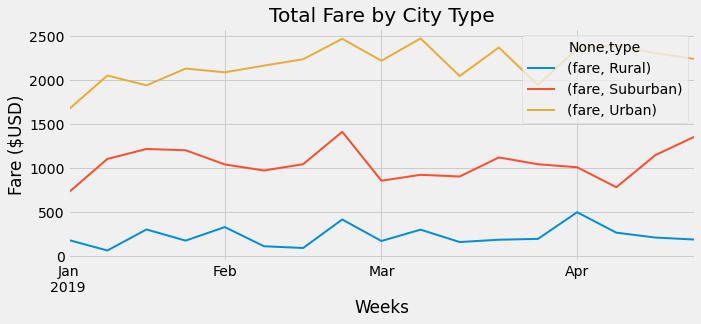

<Figure size 432x288 with 0 Axes>

In [52]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_resample_df.plot(kind ='line', figsize =(10,4), linewidth=2)

# Anotating X, Y axis and title of the graph
plt.ylabel('Fare ($USD)')
plt.xlabel('Weeks')
plt.title('Total Fare by City Type')
plt.show()

# Saving the figure to analysis folder
plt.savefig("analysis/PyBer_fare_summary.png")
